<a href="https://colab.research.google.com/github/ARGF0RCE/Shiny-TF-DC-UC-Resources/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... *predicting a number*.

In [1]:
## Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU (UUID: GPU-9a78f125-7401-3262-149a-8818757a31e6)


## Creating data to view and fit

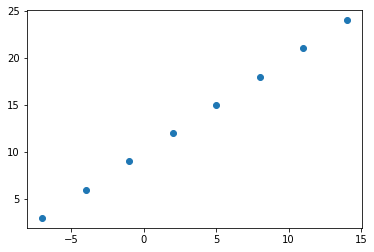

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y);

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# X.shape, y.shape
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_price, house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into Tensors with dtype float32
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

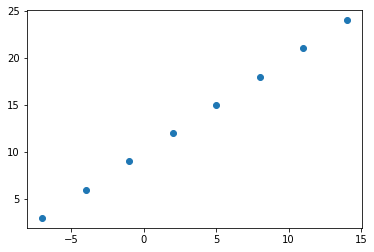

In [9]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function, optimizer and evaluation metrics
3. **Fitting the model** - letting the model try to find patterns between `X` & `y`.

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Checkout X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([[17.]])

In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving the model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the *learning rate* of the optimization function.
3. **Fitting a model** - here we might fit a model for more *epochs* or on *more data*.

In [14]:
# Let's build rebuild our model
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 179ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Predict using the updated model
model.predict([[17.0]])

array([[30.158512]], dtype=float32)

In [17]:
# Rebuilding the model, again!
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model, again for 100 epochs
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 302ms/step - loss: 12.3880 - mae: 12.3880
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.8471 - mae: 11.8471
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2973 - mae: 11.2973
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7332 - mae: 10.7332
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1467 - mae: 10.1467
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5323 - mae: 9.5323
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.8876 - mae: 8.8876
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2074 - mae: 8.2074
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4906 - mae: 7.4906
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.7282 - mae: 6.7282
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - l

In [18]:
# Now predict the results
model.predict([[17.]])

array([[31.175186]], dtype=float32)

In [19]:
# Rebuild the model, till you drop (just kidding);)!
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 233ms/step - loss: 12.0406 - mae: 12.0406
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9698 - mae: 10.9698
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8715 - mae: 9.8715
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7363 - mae: 8.7363
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5533 - mae: 7.5533
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9063 - mae: 6.9063
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5343 - mae: 7.5343
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2001 - mae: 8.2001
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2804 - mae: 8.2804
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9694 - mae: 7.9694
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7

In [20]:
# Now let's predict again
model.predict([[17.]])

array([[25.978287]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you go through when building neural networks

```
Build a model -> fit it -> Evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are three words you should memorize:

> "Visualize, Visualize, Visualize"

In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [22]:
# Make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

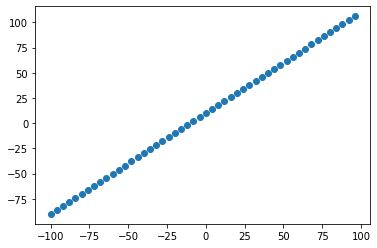

In [23]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [24]:
# Check how many samples we have
len(X)

50

In [25]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

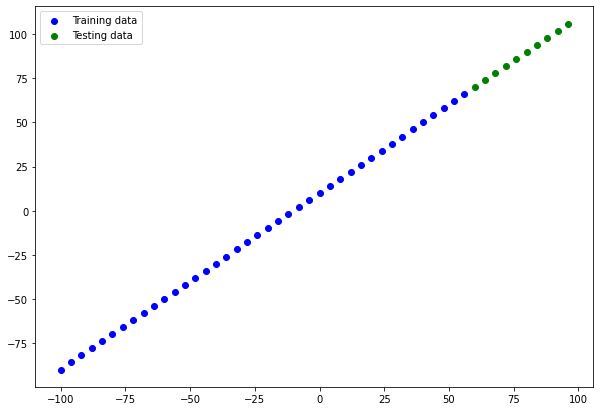

In [26]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

> 🔑 **Note:** Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [28]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: ignored

Ahh, the cell above errors because we haven't fit our built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [30]:
# This will work aafter specifying the input shape
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

In [31]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

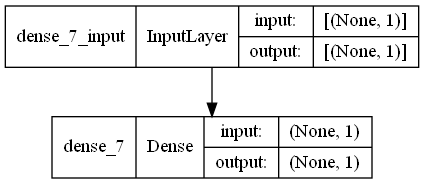

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [33]:
# Make predictions
y_preds = model.predict(X_test)

In [34]:
# View the predictions
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [35]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

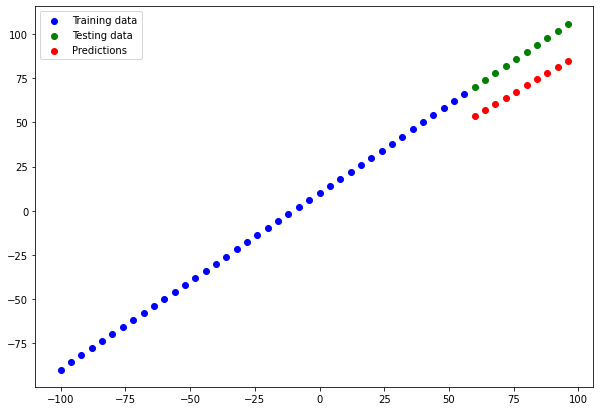

In [36]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [37]:
# Improving the model
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]),
  tf.keras.layers.Dense(1) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 24.7643 - mae: 24.7643
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 19.0261 - mae: 19.0261
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 13.5868 - mae: 13.5868
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.8756 - mae: 8.8756
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6328 - mae: 8.6328
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8267 - mae: 10.8267
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.7707 - mae: 11.7707
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8002 - mae: 11.8002
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1963 - mae: 11.1963
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0508 - mae: 10.0508
Epoch 11/100
2/2 [==============================] - 0s 3ms/step

In [38]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([[ 72.42826 ],
       [ 76.586716],
       [ 80.74517 ],
       [ 84.90363 ],
       [ 89.062096],
       [ 93.22056 ],
       [ 97.37901 ],
       [101.537476],
       [105.69593 ],
       [109.85439 ]], dtype=float32)

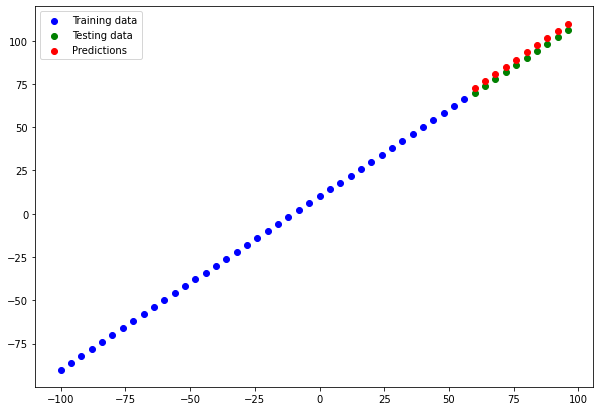

In [39]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)